# 1. 

How would you define clustering? Can you name a few clustering algorithms?

## My Solution 

Clustering algorithms attempt to group data instances. These groups attempt to be closly grouped together and we attempt to find the proper amount of groups.

Some algorithms include: K-means, DBScan BIRCH. 



# 2. 

What are some of the main applications of clustering algorithms?

## My solution 

Clustering algorithms have many uses. They can be used to propragate labels, detect anamolies, image segmentation, demensionality reduction, recomender systems, and density estimation. 


# 3.

Describe two techniques to select the right number of clusters when using K-Means.

## My solution 

When using K-means there are a number of techniques to determining the correct amount of clusters. Performing the algorithm many times we can find the inertia and see were an elbow occurs. That is where the inertia no loger significantly decreases in score. 

Another technique is to use the sillote coefficent. A sillote coefficent can be computed for when we increase/decrease the total number of clusters. We can further visualize this and see when every cluster nears one another in score. This will help distribute the clusters uniformly. 

# 4. 

What is label propagation? Why would you implement it, and how?

## My solution 

Label propagation is a clustering method in which determine an instance's label from a subset of the entire data set. With clustering we hope that instnaces with label $y_1$ goes into cluster 1, every instance with label $y_2$ goes into cluster 2, ..., and every instance with label $y_n$ goes into cluster n. When this occurs we know that each instance within the cluster should have the label that was placed into the group. 

We would implement it if we are given an incomplete dataset or we are creating a dataset but labeling every instance is expensive. 

The book displays the variuos ways label propogation can be accomplished. 

# 5. 

Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

## My Solution 

Scales to large datasets: Agglomerative clustering and BIRCH. 

Looks for regions of high density: DBSCAN, 

# 6. 
Can you think of a use case where active learning would be useful? How would you implement it?

## My solution 

Actice learning adds extra steps to label propogation. After predicting labels, we look at a probalistic scores. Looking at lower scores, 50 - 70%. We take a look at the instance and determine it should in fact be that assigned label. This helps in increasing the accuracy of our labels, which can significantly impact outcomes from supervised learning. 



# 7. 

What is the difference between anomaly detection and novelty detection?

## My solution 

Anomaly detection (also called outlier detection) is the task of detecting instances that deviate strongly from the norm. These instances are called anomalies, or outliers, while the normal instances are called inliers. It's commonly used to clean a dataset 

Novelty detection differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Because of this novely detection concerns itself with detecting if new instance fit into what is normal. 

If I was an engineer trying to automate a process that has been done by man. We could ask the man to label which instances are defective. We can remove those defective ones and build our novelty model. Thus in the future, we can automatically determine which are novel/not. 

# 8.

What is a Gaussian mixture? What tasks can you use it for?

## My solution 

A GMM is similar to a cluster algorithm but instead it takes a soft approach. It determines distributions instead of clustes, gives a probability the instance belongs to said cluster. 

It is great for anomaly detection due to it's reliance on distrubutions. 



# 9.

Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

## My solution 

The GMMS have various ways of determining the correct number of clusters. The AIC/BIC methods are common ways to accomplish this. AIC/BIC are statistical methods using the likelikhood function to determine the scores. The lower the score, the better it usually is. 

Likewise we can use a Baysian GMM. The algorithm of a BGMM assignes weights to each cluster, weighting uncessary clusters to 0. 

# 10. 

The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [53]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces() 

In [2]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [2]:
dataset.images
#Appears to be scaled

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 10,test_size = .1, random_state = 42)
sss.get_n_splits(dataset.images, dataset.target)

10

In [4]:
for train_index, test_index in sss.split(dataset.images, dataset.target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dataset.images[train_index], dataset.images[test_index]
    y_train, y_test = dataset.target[train_index], dataset.target[test_index]

TRAIN: [236 330 109 369 251  60  63 288  95 262  65 276 213  86 261 302 337 345
 105 340 216 245 317 167 184 134  77 296 305 274 263  94 351  14 121 311
  74 112 116  88 158  11 358 282 380 283  38  70 204 395 290 250 334 399
 336 287   5 232 144  40  82 202 145 346 364 187  87 267 222 131 227 326
  64 398  32  72 175 237  42  79 106 275 367 143  45 393 207 316  71  21
  53 177 344  48 165 215   9 252 224 235 189 156 374 180 342  93 196 313
 249  13 383 181  47 329 123 256  62 234 163 327 151 259 130 142  23 388
 335 239 293 124  92  59 223  31   3 272 244  29 266 125 229  61 324 394
  36 200 225 242 349 128 386 389 365 303 231 348 381 226 281 233  20 301
 172  84 366 298 149 117 129 170 199 271 273   4  99  81  34 148 396 387
 280 155 268  43  46  80 185 310  78  73  18 378 186 279 286 373 240 300
 188 193 157 162  97 174 371   1  85  25  17   0 321 294 291 339 308 153
 322  33 253 260  10  28 323 241  30 111 353  90 357 372 246 356 228 214
 355 103 314 377 397 221  37 208  96 325 195

In [5]:
#Ran into issues with data dimensions down below. 
#Data is oddly shaped. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(360, 64, 64) (360,)
(40, 64, 64) (40,)


In [6]:
#The book exercise did it slightly different. 
#The method they use further splits the data 

#It appears to do so in order flatten the image. 64*64 = 4096
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(dataset.data,dataset.target))
X_train_valid =dataset.data[train_valid_idx]
y_train_valid = dataset.target[train_valid_idx]
X_test = dataset.data[test_idx]
y_test = dataset.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [7]:

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [9]:
X_train

array([[0.70247936, 0.74380165, 0.77272725, ..., 0.21900827, 0.45867768,
        0.6363636 ],
       [0.3553719 , 0.39256197, 0.446281  , ..., 0.17355372, 0.18181819,
        0.18595041],
       [0.3305785 , 0.4090909 , 0.5495868 , ..., 0.6983471 , 0.70247936,
        0.59917355],
       ...,
       [0.28099173, 0.19008264, 0.19008264, ..., 0.30578512, 0.3181818 ,
        0.3181818 ],
       [0.338843  , 0.40495867, 0.5082645 , ..., 0.58264464, 0.57024795,
        0.5495868 ],
       [0.6404959 , 0.6818182 , 0.71900827, ..., 0.4090909 , 0.4214876 ,
        0.41735536]], dtype=float32)

In [10]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


In [11]:
#Code from book determining elbow from inertia 
#Get inertias at k
inertias = [model.inertia_ for model in kmeans_per_k]

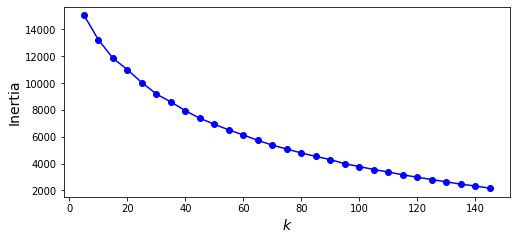

In [12]:
#Plot the results 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

As we can see there is not really a significant change of rate which constitute an elbow. 

Thus another way to determine a optimal number of clusters is to use the silhouette_score.

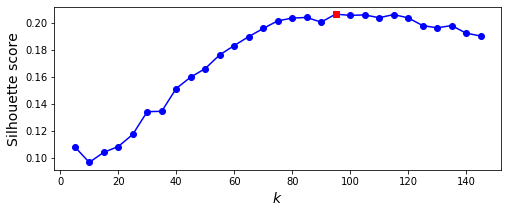

In [14]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [15]:
best_index*5

90

It appears that the optimal cluster is 90. We can now proceed. 

In [16]:
#Following textbook format 
best_model = kmeans_per_k[best_index]

In [19]:
import pickle
f = open("best_kmeans_model.pkl", "wb")
pickle.dump(best_model, f)

Cluster 0


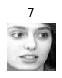

Cluster 1


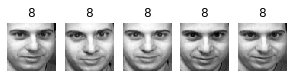

Cluster 2


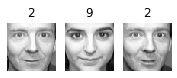

Cluster 3


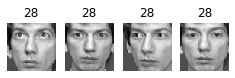

Cluster 4


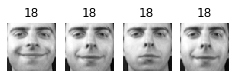

Cluster 5


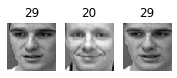

Cluster 6


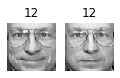

Cluster 7


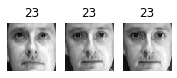

Cluster 8


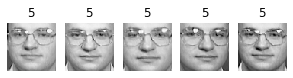

Cluster 9


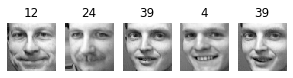

Cluster 10


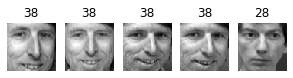

Cluster 11


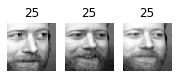

Cluster 12


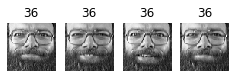

Cluster 13


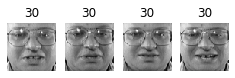

Cluster 14


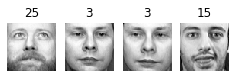

Cluster 15


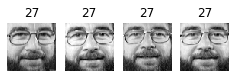

Cluster 16


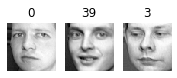

Cluster 17


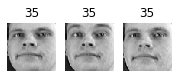

Cluster 18


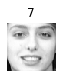

Cluster 19


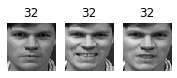

Cluster 20


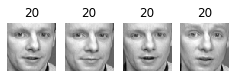

Cluster 21


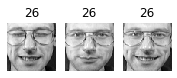

Cluster 22


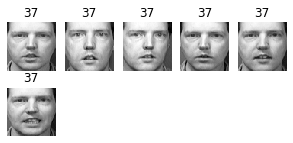

Cluster 23


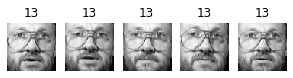

Cluster 24


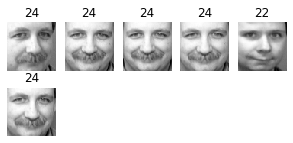

Cluster 25


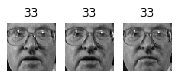

Cluster 26


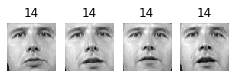

Cluster 27


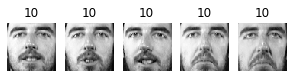

Cluster 28


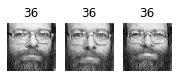

Cluster 29


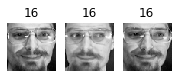

Cluster 30


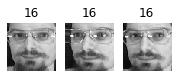

Cluster 31


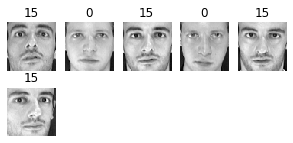

Cluster 32


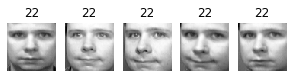

Cluster 33


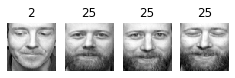

Cluster 34


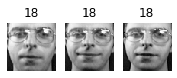

Cluster 35


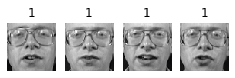

Cluster 36


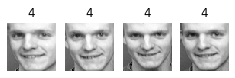

Cluster 37


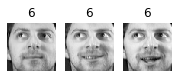

Cluster 38


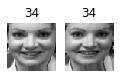

Cluster 39


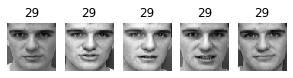

Cluster 40


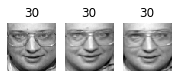

Cluster 41


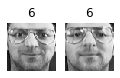

Cluster 42


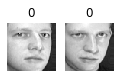

Cluster 43


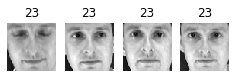

Cluster 44


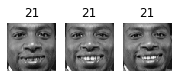

Cluster 45


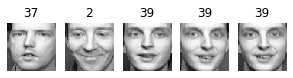

Cluster 46


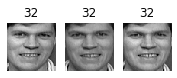

Cluster 47


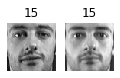

Cluster 48


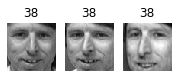

Cluster 49


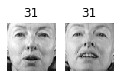

Cluster 50


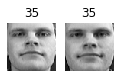

Cluster 51


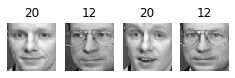

Cluster 52


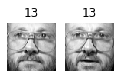

Cluster 53


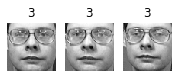

Cluster 54


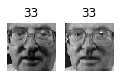

Cluster 55


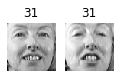

Cluster 56


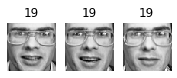

Cluster 57


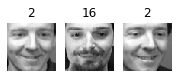

Cluster 58


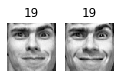

Cluster 59


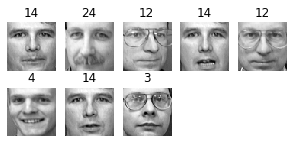

Cluster 60


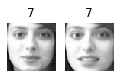

Cluster 61


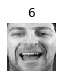

Cluster 62


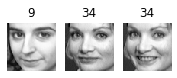

Cluster 63


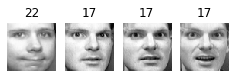

Cluster 64


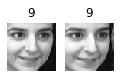

Cluster 65


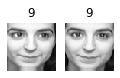

Cluster 66


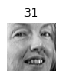

Cluster 67


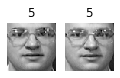

Cluster 68


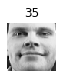

Cluster 69


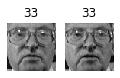

Cluster 70


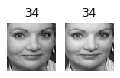

Cluster 71


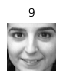

Cluster 72


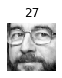

Cluster 73


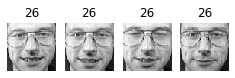

Cluster 74


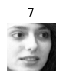

Cluster 75


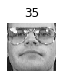

Cluster 76


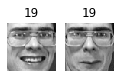

Cluster 77


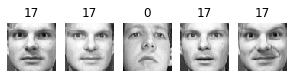

Cluster 78


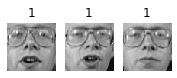

Cluster 79


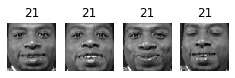

Cluster 80


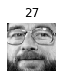

Cluster 81


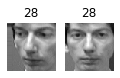

Cluster 82


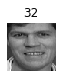

Cluster 83


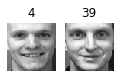

Cluster 84


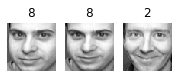

Cluster 85


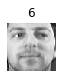

Cluster 86


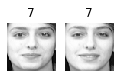

Cluster 87


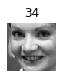

Cluster 88


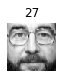

Cluster 89


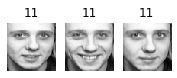

Cluster 90


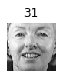

Cluster 91


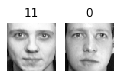

Cluster 92


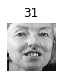

Cluster 93


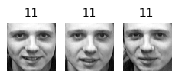

Cluster 94


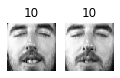

In [20]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64) # Must reshape the data
    n_rows = (len(faces) - 1) // n_cols + 1 
    plt.figure(figsize=(n_cols, n_rows * 1.1)) 
    for index, (face, label) in enumerate(zip(faces, labels)): #Can only pass in a single object
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_): 
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id #Cool way of selecting the models 
    faces = X_train[in_cluster] 
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Faces do appear to be similar 

Note: the book use PCA to reduce the dimensionality of the dataset, improving speed. 

# 11. 

Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

Try not use logistic regresson, there is more than a binary thing to predict. 

In [57]:
import pickle
best_model = pickle.load( open( "best_kmeans_model.pkl", "rb" ) )

In [60]:
help(best_model)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (ro

In [61]:
best_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 95,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [64]:
from sklearn.ensemble import RandomForestClassifier

X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

clf = RandomForestClassifier(n_estimators=95, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_test_reduced, y_test)

0.775

Scoring on the reduced test sets, we ended up lesser performance. Now trying it as a pipeline. 

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

best_k = 95
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=best_k, random_state=42)),
    ("log_reg", RandomForestClassifier(n_estimators=95, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=95, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=95, n_jobs=Non

In [67]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.775

In [70]:
# How much did the error rate drop?
1 - (1 - pipeline_score) / (1 - clf.score(X_test_reduced, y_test))

0.0

In [55]:
#On the original untransformed dataset. 
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
# A lot of overfitting 

1.0

Using the flattened images, clustering did terribly. The optimal number of clusters is less than the logistic regression score. 

The solutions manual indicates that the distances to the cluster centroids are not as informative as the original images.

# 12.

Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).


In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
d

199

In [14]:
pca = PCA(n_components = d)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=199, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [16]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_reduced)
np.round(bgm.weights_, 2)
#Dang! That was quick! 

array([0.08, 0.06, 0.11, 0.14, 0.12, 0.06, 0.1 , 0.09, 0.15, 0.09])

In [17]:
#Chapter 3 contained exercises where I had to visualize photos 
new_face = bgm.sample()
new_face = new_face[0]

In [18]:
#Now an inverse function should be used to get the inital shape 
new_face.shape

(1, 199)

In [19]:
recovered_face = pca.inverse_transform(new_face)

In [20]:
recovered_face.shape

(1, 4096)

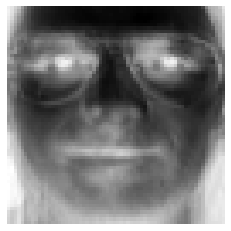

In [21]:
import matplotlib.pyplot as plt

some_face = recovered_face
some_face_image = some_face.reshape(64, 64)

plt.imshow(some_face_image, cmap="binary")
plt.axis("off")
plt.show()

In [22]:
#In comparison to [::-1]
#  reversed() is easier to read, runs faster, and uses substantially less memory
#Unfortuntly it does not work on numpy arrays.

#Numpy has a function for this 
flipped_face = np.flip(recovered_face)

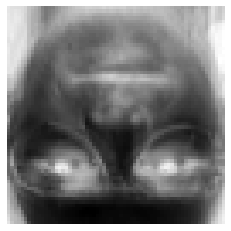

In [23]:
flipped_face_image = flipped_face.reshape(64, 64)

plt.imshow(flipped_face_image, cmap="binary")
plt.axis("off")
plt.show()

In [24]:
bgm.score_samples(new_face)

array([379.48970725])

In [25]:
bgm.score_samples(np.flip(new_face))

array([-88270.75527765])

As we can see the score is a negative number with a large magnitude. I believe this indicates that the flipped image is a anomaly 


# 12 

Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [27]:
#We did PCA with 99% of the variance preserved. 
X_reduced =  pca.fit_transform(X_train)
X_preimage =  pca.inverse_transform(X_reduced)

In [29]:
rom sklearn.metrics import mean_squared_error
mean_squared_error(X_train, X_preimage)

0.00019488041

There is very low reconstruction error, as we would expect on the entire dataset without any manipulations. 

In [40]:
X_train.shape

(280, 4096)

In [49]:
X_train[0,:].shape

(4096,)

In [50]:
X_train[:,0].shape

(280,)

In [51]:
X_reduced =  pca.fit_transform(X_train)
X_preimage =  pca.inverse_transform(np.flip(X_reduced))
mean_squared_error(X_train, X_preimage)

0.03817445

By order of magnitude, the error does not seem to large. Despite this, the error is 1000 times more than if we did not flip it. 